# Tomography

* Anton Karazeev, you can text me: [anton.karazeev@gmail.com](mailto:anton.karazeev@gmail.com) or [t.me/akarazeev](t.me/akarazeev)
* Based on [QISKit tutorial](https://github.com/QISKit/qiskit-tutorial)

In [45]:
import pickle

In [3]:
import os
import sys
from math import pi

from IPython.display import Image

from math import pi
import Qconfig
from qiskit import QuantumProgram
from qiskit.tools.visualization import plot_histogram, plot_state
import qiskit.tools.qcvv.tomography as tomo

assert sys.version_info >= (3,5), "Only Python 3.5 or greater supported."

In [2]:
# Create your first QuantumProgram object instance.
Q_program = QuantumProgram()
Q_program.set_api(Qconfig.APItoken, Qconfig.config["url"])

# List of available backends.
Q_program.available_backends()

['ibmqx2',
 'ibmqx5',
 'ibmqx4',
 'ibmqx_hpc_qasm_simulator',
 'ibmqx_qasm_simulator',
 'local_projectq_simulator',
 'local_qasm_simulator',
 'local_clifford_simulator',
 'local_qiskit_simulator',
 'local_unitary_simulator']

In [4]:
n = 1
q_regs = Q_program.create_quantum_register("qr", n)
c_regs = Q_program.create_classical_register("cr", n)

In [6]:
# Id on qubit-0 only.
ident = Q_program.create_circuit('id', [q_regs], [c_regs])
ident.iden(q_regs[0])

In [61]:
ident_tomo_set

{'circuit_labels': ['_prep_S0(0)_meas_X(0)',
  '_prep_S0(0)_meas_Y(0)',
  '_prep_S0(0)_meas_Z(0)',
  '_prep_S1(0)_meas_X(0)',
  '_prep_S1(0)_meas_Y(0)',
  '_prep_S1(0)_meas_Z(0)',
  '_prep_S2(0)_meas_X(0)',
  '_prep_S2(0)_meas_Y(0)',
  '_prep_S2(0)_meas_Z(0)',
  '_prep_S3(0)_meas_X(0)',
  '_prep_S3(0)_meas_Y(0)',
  '_prep_S3(0)_meas_Z(0)'],
 'circuits': [{'meas': {0: 'X'}, 'prep': {0: ('S', 0)}},
  {'meas': {0: 'Y'}, 'prep': {0: ('S', 0)}},
  {'meas': {0: 'Z'}, 'prep': {0: ('S', 0)}},
  {'meas': {0: 'X'}, 'prep': {0: ('S', 1)}},
  {'meas': {0: 'Y'}, 'prep': {0: ('S', 1)}},
  {'meas': {0: 'Z'}, 'prep': {0: ('S', 1)}},
  {'meas': {0: 'X'}, 'prep': {0: ('S', 2)}},
  {'meas': {0: 'Y'}, 'prep': {0: ('S', 2)}},
  {'meas': {0: 'Z'}, 'prep': {0: ('S', 2)}},
  {'meas': {0: 'X'}, 'prep': {0: ('S', 3)}},
  {'meas': {0: 'Y'}, 'prep': {0: ('S', 3)}},
  {'meas': {0: 'Z'}, 'prep': {0: ('S', 3)}}],
 'meas_basis': {'X': [array([[ 0.5,  0.5],
          [ 0.5,  0.5]]), array([[ 0.5, -0.5],
          [-0.

In [62]:
ident_tomo_circuits

['id_prep_S0(0)_meas_X(0)',
 'id_prep_S0(0)_meas_Y(0)',
 'id_prep_S0(0)_meas_Z(0)',
 'id_prep_S1(0)_meas_X(0)',
 'id_prep_S1(0)_meas_Y(0)',
 'id_prep_S1(0)_meas_Z(0)',
 'id_prep_S2(0)_meas_X(0)',
 'id_prep_S2(0)_meas_Y(0)',
 'id_prep_S2(0)_meas_Z(0)',
 'id_prep_S3(0)_meas_X(0)',
 'id_prep_S3(0)_meas_Y(0)',
 'id_prep_S3(0)_meas_Z(0)']

In [8]:
# Process tomography set for a quantum operation on qubit-0.
ident_tomo_set =  tomo.process_tomography_set([0])

# Generate process tomography preparation and measurement circuits.
ident_tomo_circuits = tomo.create_tomography_circuits(Q_program, 'id', q_regs,
                                                      c_regs, ident_tomo_set)
print('Tomography circuit labels for "id" circuit:')
for label in ident_tomo_circuits:
    print(label)

Tomography circuit labels for "id" circuit:
id_prep_S0(0)_meas_X(0)
id_prep_S0(0)_meas_Y(0)
id_prep_S0(0)_meas_Z(0)
id_prep_S1(0)_meas_X(0)
id_prep_S1(0)_meas_Y(0)
id_prep_S1(0)_meas_Z(0)
id_prep_S2(0)_meas_X(0)
id_prep_S2(0)_meas_Y(0)
id_prep_S2(0)_meas_Z(0)
id_prep_S3(0)_meas_X(0)
id_prep_S3(0)_meas_Y(0)
id_prep_S3(0)_meas_Z(0)


In [10]:
backend = 'local_qasm_simulator'
shots = 1000
ident_tomo_results = Q_program.execute(ident_tomo_circuits, shots=shots, backend=backend)

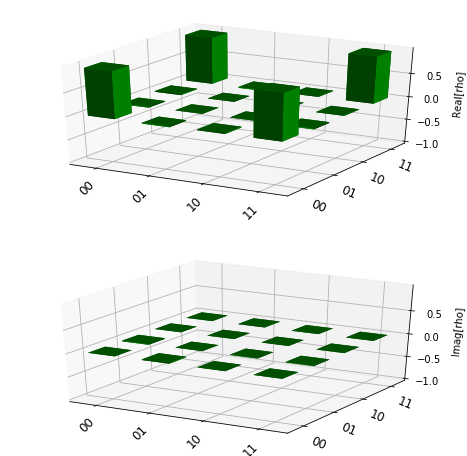

In [20]:
ident_process_data = tomo.tomography_data(ident_tomo_results, 'id', ident_tomo_set)
ident_choi_fit = tomo.fit_tomography_data(ident_process_data, options={'trace': 2})
plot_state(ident_choi_fit)

In [13]:
# Now run on real device.
backend = 'ibmqx2'

# Run the experiment.
identqx_tomo_results = Q_program.execute(ident_tomo_circuits, backend='ibmqx2',
                                         shots=1024, max_credits=3, wait=10,
                                         timeout=600)
print(identqx_tomo_results)

COMPLETED


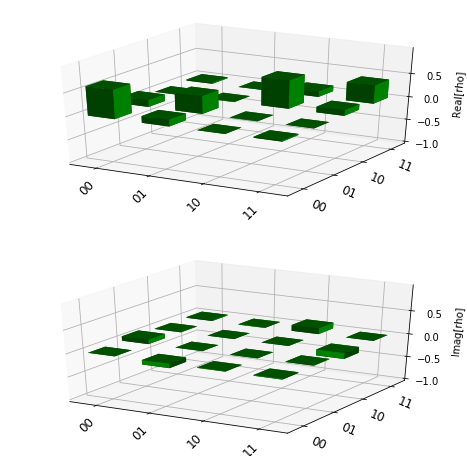

In [22]:
identqx_process_data = tomo.tomography_data(identqx_tomo_results, 'id', ident_tomo_set)
identqx_choi_fit = tomo.fit_tomography_data(identqx_process_data, options={'trace':2})
plot_state(identqx_choi_fit)

In [48]:
with open('data/identqx_process_data.pkl', 'wb') as f:
    pickle.dump(identqx_process_data, f)

In [28]:
# Rx(Pi) on qubit-0 only.
RxPi = Q_program.create_circuit('RxPi', [q_regs], [c_regs])
RxPi.rx(pi, q_regs[0])

RxPi_tomo_set =  tomo.process_tomography_set([0])
RxPi_tomo_circuits = tomo.create_tomography_circuits(Q_program, 'RxPi', q_regs,
                                                      c_regs, RxPi_tomo_set)
print('Tomography circuit labels for "RxPi" circuit:')
for label in RxPi_tomo_circuits:
    print(label)

Tomography circuit labels for "RxPi" circuit:
RxPi_prep_S0(0)_meas_X(0)
RxPi_prep_S0(0)_meas_Y(0)
RxPi_prep_S0(0)_meas_Z(0)
RxPi_prep_S1(0)_meas_X(0)
RxPi_prep_S1(0)_meas_Y(0)
RxPi_prep_S1(0)_meas_Z(0)
RxPi_prep_S2(0)_meas_X(0)
RxPi_prep_S2(0)_meas_Y(0)
RxPi_prep_S2(0)_meas_Z(0)
RxPi_prep_S3(0)_meas_X(0)
RxPi_prep_S3(0)_meas_Y(0)
RxPi_prep_S3(0)_meas_Z(0)


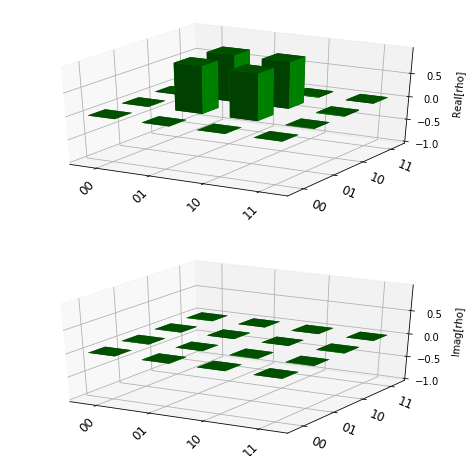

In [30]:
backend = 'local_qasm_simulator'
shots = 1000
RxPi_tomo_results = Q_program.execute(RxPi_tomo_circuits, shots=shots, backend=backend)

RxPi_process_data = tomo.tomography_data(RxPi_tomo_results, 'RxPi', RxPi_tomo_set)
RxPi_choi_fit = tomo.fit_tomography_data(RxPi_process_data, options={'trace': 2})
plot_state(RxPi_choi_fit)

COMPLETED


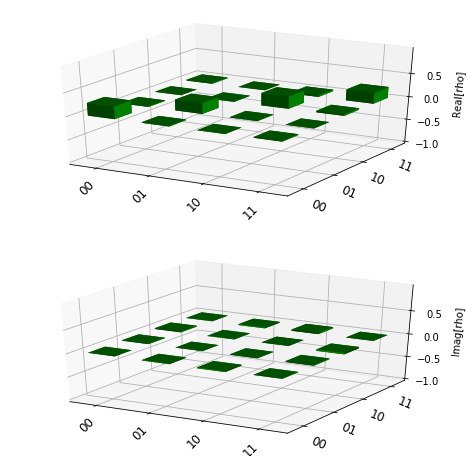

In [38]:
# backend = 'ibmqx2'
# RxPiqx_tomo_results = Q_program.execute(RxPi_tomo_circuits, backend='ibmqx2',
#                                          shots=1024, max_credits=3, wait=10,
#                                          timeout=600)
print(RxPiqx_tomo_results)
RxPiqx_process_data = tomo.tomography_data(RxPiqx_tomo_results, 'RxPi', RxPi_tomo_set)
RxPiqx_choi_fit = tomo.fit_tomography_data(RxPiqx_process_data, options={'trace':1})
plot_state(RxPiqx_choi_fit)

In [49]:
with open('data/RxPiqx_process_data.pkl', 'wb') as f:
    pickle.dump(RxPiqx_process_data, f)

Tomography circuit labels for "RxPi2" circuit:
RxPi2_prep_S0(0)_meas_X(0)
RxPi2_prep_S0(0)_meas_Y(0)
RxPi2_prep_S0(0)_meas_Z(0)
RxPi2_prep_S1(0)_meas_X(0)
RxPi2_prep_S1(0)_meas_Y(0)
RxPi2_prep_S1(0)_meas_Z(0)
RxPi2_prep_S2(0)_meas_X(0)
RxPi2_prep_S2(0)_meas_Y(0)
RxPi2_prep_S2(0)_meas_Z(0)
RxPi2_prep_S3(0)_meas_X(0)
RxPi2_prep_S3(0)_meas_Y(0)
RxPi2_prep_S3(0)_meas_Z(0)


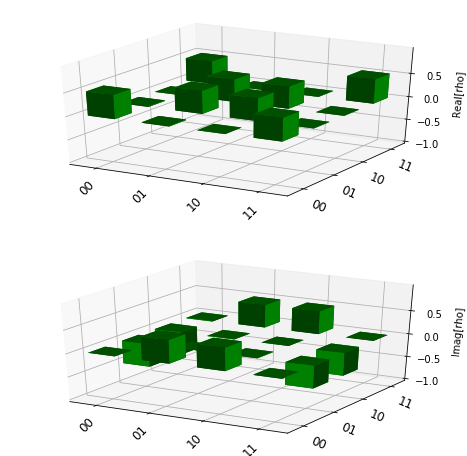

In [39]:
# Rx(Pi/2) on qubit-0 only.
RxPi2 = Q_program.create_circuit('RxPi2', [q_regs], [c_regs])
RxPi2.rx(pi/2., q_regs[0])

RxPi2_tomo_set =  tomo.process_tomography_set([0])
RxPi2_tomo_circuits = tomo.create_tomography_circuits(Q_program, 'RxPi2', q_regs,
                                                      c_regs, RxPi2_tomo_set)
print('Tomography circuit labels for "RxPi2" circuit:')
for label in RxPi2_tomo_circuits:
    print(label)
    
backend = 'local_qasm_simulator'
shots = 1000
RxPi2_tomo_results = Q_program.execute(RxPi2_tomo_circuits, shots=shots, backend=backend)

RxPi2_process_data = tomo.tomography_data(RxPi2_tomo_results, 'RxPi2', RxPi2_tomo_set)
RxPi2_choi_fit = tomo.fit_tomography_data(RxPi2_process_data, options={'trace': 2})
plot_state(RxPi2_choi_fit)

COMPLETED


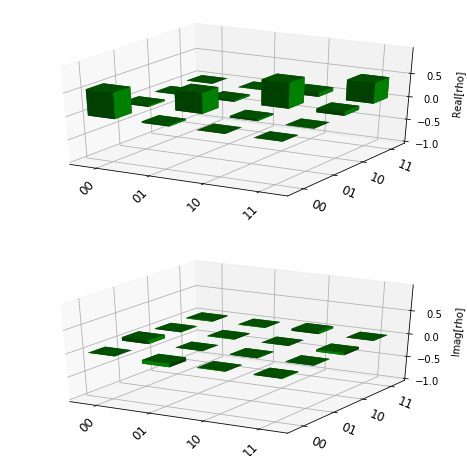

In [40]:
backend = 'ibmqx2'
RxPi2qx_tomo_results = Q_program.execute(RxPi2_tomo_circuits, backend='ibmqx2',
                                         shots=1024, max_credits=3, wait=10,
                                         timeout=600)
print(RxPi2qx_tomo_results)
RxPi2qx_process_data = tomo.tomography_data(RxPi2qx_tomo_results, 'RxPi2', RxPi2_tomo_set)
RxPi2qx_choi_fit = tomo.fit_tomography_data(RxPi2qx_process_data, options={'trace':2})
plot_state(RxPi2qx_choi_fit)

In [52]:
with open('data/RxPi2qx_process_data.pkl', 'wb') as f:
    pickle.dump(RxPi2qx_process_data, f)

Tomography circuit labels for "RyPi2" circuit:
RyPi2_prep_S0(0)_meas_X(0)
RyPi2_prep_S0(0)_meas_Y(0)
RyPi2_prep_S0(0)_meas_Z(0)
RyPi2_prep_S1(0)_meas_X(0)
RyPi2_prep_S1(0)_meas_Y(0)
RyPi2_prep_S1(0)_meas_Z(0)
RyPi2_prep_S2(0)_meas_X(0)
RyPi2_prep_S2(0)_meas_Y(0)
RyPi2_prep_S2(0)_meas_Z(0)
RyPi2_prep_S3(0)_meas_X(0)
RyPi2_prep_S3(0)_meas_Y(0)
RyPi2_prep_S3(0)_meas_Z(0)


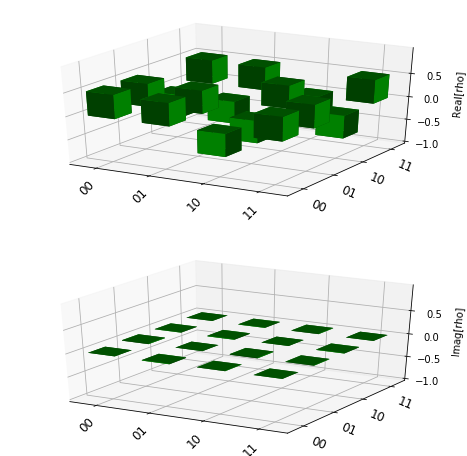

In [42]:
# Ry(Pi/2) on qubit-0 only.
RyPi2 = Q_program.create_circuit('RyPi2', [q_regs], [c_regs])
RyPi2.ry(pi/2., q_regs[0])

RyPi2_tomo_set =  tomo.process_tomography_set([0])
RyPi2_tomo_circuits = tomo.create_tomography_circuits(Q_program, 'RyPi2', q_regs,
                                                      c_regs, RyPi2_tomo_set)
print('Tomography circuit labels for "RyPi2" circuit:')
for label in RyPi2_tomo_circuits:
    print(label)
    
backend = 'local_qasm_simulator'
shots = 1000
RyPi2_tomo_results = Q_program.execute(RyPi2_tomo_circuits, shots=shots, backend=backend)

RyPi2_process_data = tomo.tomography_data(RyPi2_tomo_results, 'RyPi2', RyPi2_tomo_set)
RyPi2_choi_fit = tomo.fit_tomography_data(RyPi2_process_data, options={'trace': 2})
plot_state(RyPi2_choi_fit)

COMPLETED


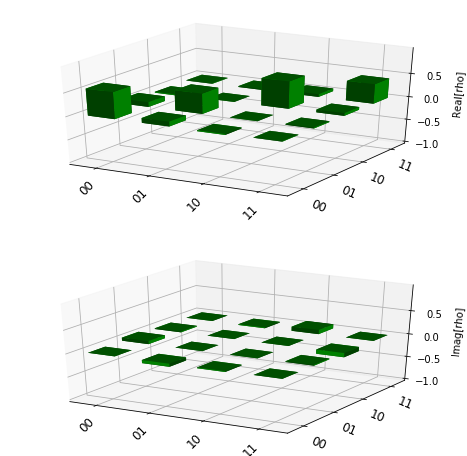

In [43]:
backend = 'ibmqx2'
RyPi2qx_tomo_results = Q_program.execute(RyPi2_tomo_circuits, backend='ibmqx2',
                                         shots=1024, max_credits=3, wait=10,
                                         timeout=600)
print(RyPi2qx_tomo_results)
RyPi2qx_process_data = tomo.tomography_data(RyPi2qx_tomo_results, 'RyPi2', RyPi2_tomo_set)
RyPi2qx_choi_fit = tomo.fit_tomography_data(RyPi2qx_process_data, options={'trace':2})
plot_state(RyPi2qx_choi_fit)

In [50]:
with open('data/RyPi2qx_process_data.pkl', 'wb') as f:
    pickle.dump(RyPi2qx_process_data, f)

In [51]:
RyPi2qx_process_data

{'data': [{'circuit': {'0': {'meas': [('X', 0)], 'prep': [('S', 0)]},
    '1': {'meas': [('X', 1)], 'prep': [('S', 0)]}},
   'counts': {'0': 616, '1': 408},
   'shots': 1024},
  {'circuit': {'0': {'meas': [('Y', 0)], 'prep': [('S', 0)]},
    '1': {'meas': [('Y', 1)], 'prep': [('S', 0)]}},
   'counts': {'0': 579, '1': 445},
   'shots': 1024},
  {'circuit': {'0': {'meas': [('Z', 0)], 'prep': [('S', 0)]},
    '1': {'meas': [('Z', 1)], 'prep': [('S', 0)]}},
   'counts': {'0': 583, '1': 441},
   'shots': 1024},
  {'circuit': {'0': {'meas': [('X', 0)], 'prep': [('S', 1)]},
    '1': {'meas': [('X', 1)], 'prep': [('S', 1)]}},
   'counts': {'0': 590, '1': 434},
   'shots': 1024},
  {'circuit': {'0': {'meas': [('Y', 0)], 'prep': [('S', 1)]},
    '1': {'meas': [('Y', 1)], 'prep': [('S', 1)]}},
   'counts': {'0': 595, '1': 429},
   'shots': 1024},
  {'circuit': {'0': {'meas': [('Z', 0)], 'prep': [('S', 1)]},
    '1': {'meas': [('Z', 1)], 'prep': [('S', 1)]}},
   'counts': {'0': 572, '1': 452},
   

In [57]:
ident_process_data['data']

[{'circuit': {'0': {'meas': [('X', 0)], 'prep': [('S', 0)]},
   '1': {'meas': [('X', 1)], 'prep': [('S', 0)]}},
  'counts': {'0': 488, '1': 512},
  'shots': 1000},
 {'circuit': {'0': {'meas': [('Y', 0)], 'prep': [('S', 0)]},
   '1': {'meas': [('Y', 1)], 'prep': [('S', 0)]}},
  'counts': {'0': 478, '1': 522},
  'shots': 1000},
 {'circuit': {'0': {'meas': [('Z', 0)], 'prep': [('S', 0)]},
   '1': {'meas': [('Z', 1)], 'prep': [('S', 0)]}},
  'counts': {'0': 1000, '1': 0},
  'shots': 1000},
 {'circuit': {'0': {'meas': [('X', 0)], 'prep': [('S', 1)]},
   '1': {'meas': [('X', 1)], 'prep': [('S', 1)]}},
  'counts': {'0': 971, '1': 29},
  'shots': 1000},
 {'circuit': {'0': {'meas': [('Y', 0)], 'prep': [('S', 1)]},
   '1': {'meas': [('Y', 1)], 'prep': [('S', 1)]}},
  'counts': {'0': 486, '1': 514},
  'shots': 1000},
 {'circuit': {'0': {'meas': [('Z', 0)], 'prep': [('S', 1)]},
   '1': {'meas': [('Z', 1)], 'prep': [('S', 1)]}},
  'counts': {'0': 355, '1': 645},
  'shots': 1000},
 {'circuit': {'0':

In [58]:
RxPiqx_process_data['data']

[{'circuit': {'0': {'meas': [('X', 0)], 'prep': [('S', 0)]},
   '1': {'meas': [('X', 1)], 'prep': [('S', 0)]}},
  'counts': {'0': 542, '1': 482},
  'shots': 1024},
 {'circuit': {'0': {'meas': [('Y', 0)], 'prep': [('S', 0)]},
   '1': {'meas': [('Y', 1)], 'prep': [('S', 0)]}},
  'counts': {'0': 533, '1': 491},
  'shots': 1024},
 {'circuit': {'0': {'meas': [('Z', 0)], 'prep': [('S', 0)]},
   '1': {'meas': [('Z', 1)], 'prep': [('S', 0)]}},
  'counts': {'0': 549, '1': 475},
  'shots': 1024},
 {'circuit': {'0': {'meas': [('X', 0)], 'prep': [('S', 1)]},
   '1': {'meas': [('X', 1)], 'prep': [('S', 1)]}},
  'counts': {'0': 591, '1': 433},
  'shots': 1024},
 {'circuit': {'0': {'meas': [('Y', 0)], 'prep': [('S', 1)]},
   '1': {'meas': [('Y', 1)], 'prep': [('S', 1)]}},
  'counts': {'0': 558, '1': 466},
  'shots': 1024},
 {'circuit': {'0': {'meas': [('Z', 0)], 'prep': [('S', 1)]},
   '1': {'meas': [('Z', 1)], 'prep': [('S', 1)]}},
  'counts': {'0': 541, '1': 483},
  'shots': 1024},
 {'circuit': {'0

In [59]:
RxPi2qx_process_data['data']

[{'circuit': {'0': {'meas': [('X', 0)], 'prep': [('S', 0)]},
   '1': {'meas': [('X', 1)], 'prep': [('S', 0)]}},
  'counts': {'0': 543, '1': 481},
  'shots': 1024},
 {'circuit': {'0': {'meas': [('Y', 0)], 'prep': [('S', 0)]},
   '1': {'meas': [('Y', 1)], 'prep': [('S', 0)]}},
  'counts': {'0': 590, '1': 434},
  'shots': 1024},
 {'circuit': {'0': {'meas': [('Z', 0)], 'prep': [('S', 0)]},
   '1': {'meas': [('Z', 1)], 'prep': [('S', 0)]}},
  'counts': {'0': 570, '1': 454},
  'shots': 1024},
 {'circuit': {'0': {'meas': [('X', 0)], 'prep': [('S', 1)]},
   '1': {'meas': [('X', 1)], 'prep': [('S', 1)]}},
  'counts': {'0': 596, '1': 428},
  'shots': 1024},
 {'circuit': {'0': {'meas': [('Y', 0)], 'prep': [('S', 1)]},
   '1': {'meas': [('Y', 1)], 'prep': [('S', 1)]}},
  'counts': {'0': 568, '1': 456},
  'shots': 1024},
 {'circuit': {'0': {'meas': [('Z', 0)], 'prep': [('S', 1)]},
   '1': {'meas': [('Z', 1)], 'prep': [('S', 1)]}},
  'counts': {'0': 574, '1': 450},
  'shots': 1024},
 {'circuit': {'0

In [60]:
RyPi2qx_process_data['data']

[{'circuit': {'0': {'meas': [('X', 0)], 'prep': [('S', 0)]},
   '1': {'meas': [('X', 1)], 'prep': [('S', 0)]}},
  'counts': {'0': 616, '1': 408},
  'shots': 1024},
 {'circuit': {'0': {'meas': [('Y', 0)], 'prep': [('S', 0)]},
   '1': {'meas': [('Y', 1)], 'prep': [('S', 0)]}},
  'counts': {'0': 579, '1': 445},
  'shots': 1024},
 {'circuit': {'0': {'meas': [('Z', 0)], 'prep': [('S', 0)]},
   '1': {'meas': [('Z', 1)], 'prep': [('S', 0)]}},
  'counts': {'0': 583, '1': 441},
  'shots': 1024},
 {'circuit': {'0': {'meas': [('X', 0)], 'prep': [('S', 1)]},
   '1': {'meas': [('X', 1)], 'prep': [('S', 1)]}},
  'counts': {'0': 590, '1': 434},
  'shots': 1024},
 {'circuit': {'0': {'meas': [('Y', 0)], 'prep': [('S', 1)]},
   '1': {'meas': [('Y', 1)], 'prep': [('S', 1)]}},
  'counts': {'0': 595, '1': 429},
  'shots': 1024},
 {'circuit': {'0': {'meas': [('Z', 0)], 'prep': [('S', 1)]},
   '1': {'meas': [('Z', 1)], 'prep': [('S', 1)]}},
  'counts': {'0': 572, '1': 452},
  'shots': 1024},
 {'circuit': {'0